#### Dataset

In [2]:
# iris 

#### Import the libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Load the dataset

In [6]:
df = sns.load_dataset('iris')

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Separate the input and output variables 

In [13]:
# input data 
x = df.iloc[:,:4]

# output data 
y = df['species']

#### EDA

In [15]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


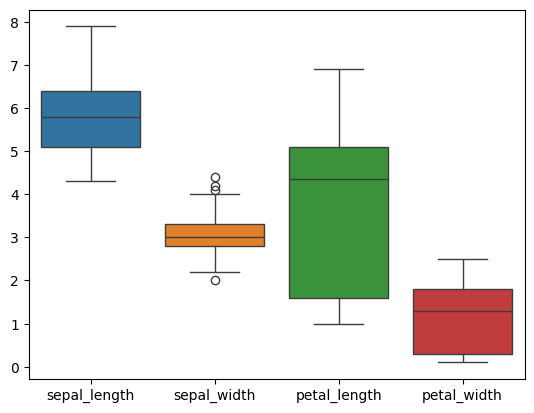

In [16]:
sns.boxplot(x);

<Axes: xlabel='petal_length', ylabel='Density'>

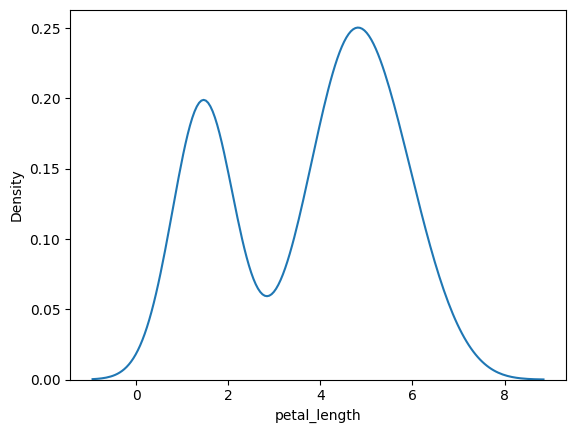

In [18]:
sns.kdeplot(x['petal_length'])

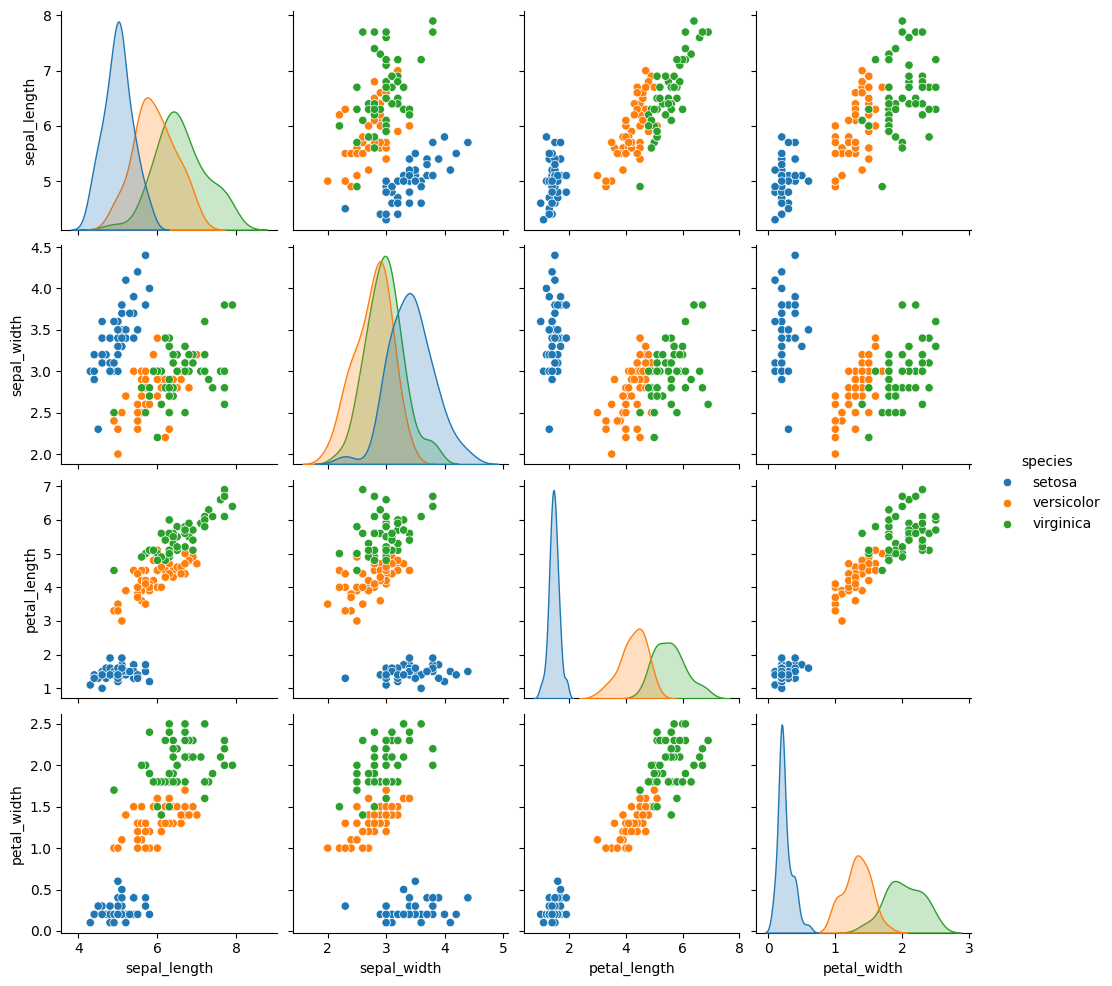

In [20]:
sns.pairplot(df, hue='species')

#### Cross Validation

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [24]:
x_train.shape

(112, 4)

In [25]:
x_test.shape

(38, 4)

#### Build the model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

#### Performance Evaluation

In [31]:
y_pred = knn.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [34]:
y_test.value_counts()

species
versicolor    16
setosa        13
virginica      9
Name: count, dtype: int64

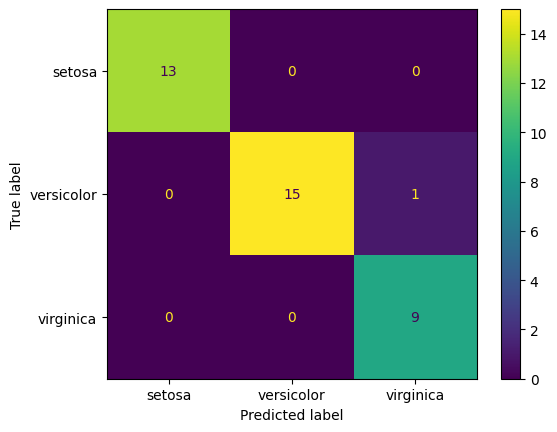

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Experimentation on Value of K

In [39]:
np.mean(y_test != y_pred)

0.02631578947368421

In [42]:
error = []
for k in range(1,41): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test) 
    error.append(np.mean(y_test != pred))

In [41]:
error

[0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.07894736842105263,
 0.10526315789473684,
 0.05263157894736842,
 0.05263157894736842,
 0.02631578947368421,
 0.07894736842105263,
 0.05263157894736842,
 0.07894736842105263,
 0.05263157894736842,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263]

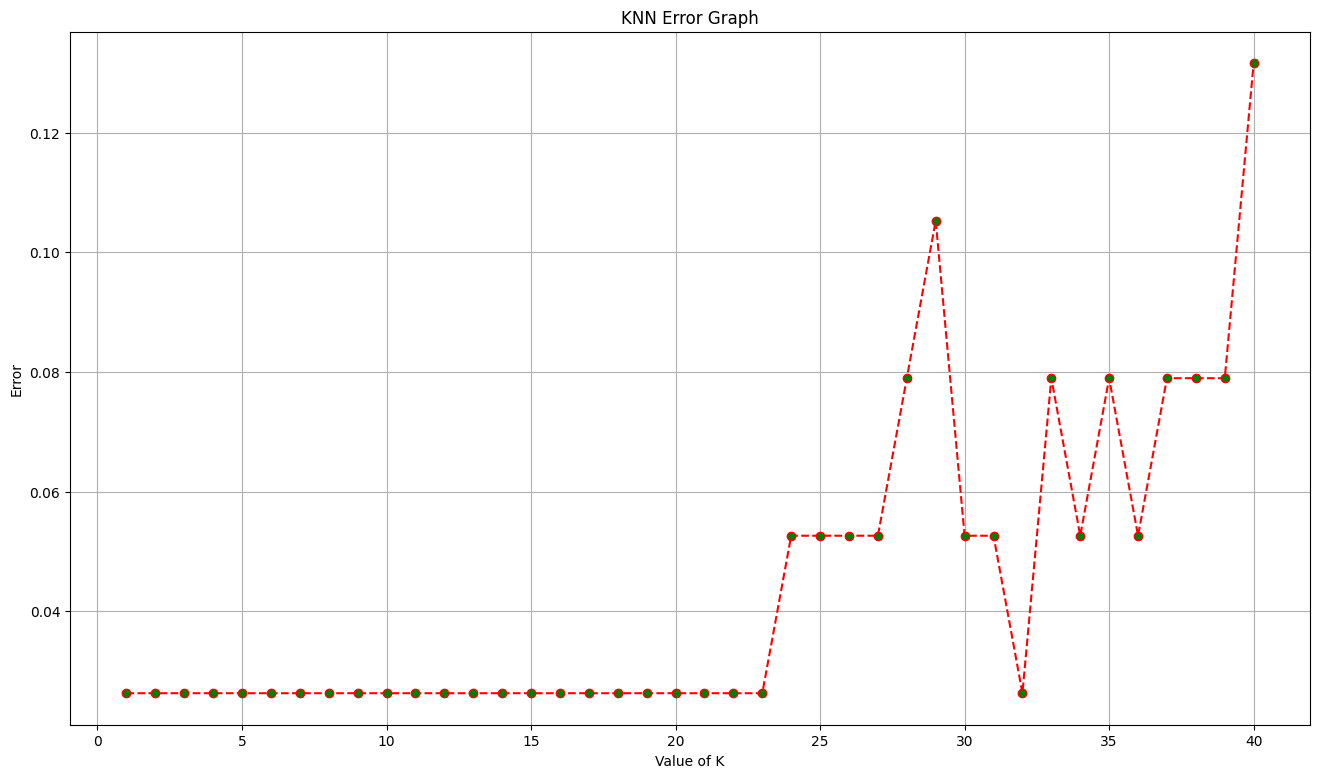

In [46]:
plt.figure(figsize=(16,9))
plt.title('KNN Error Graph')
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.plot(range(1,41), error, marker = 'o', mfc = 'green', color='red',
         ls = '--')

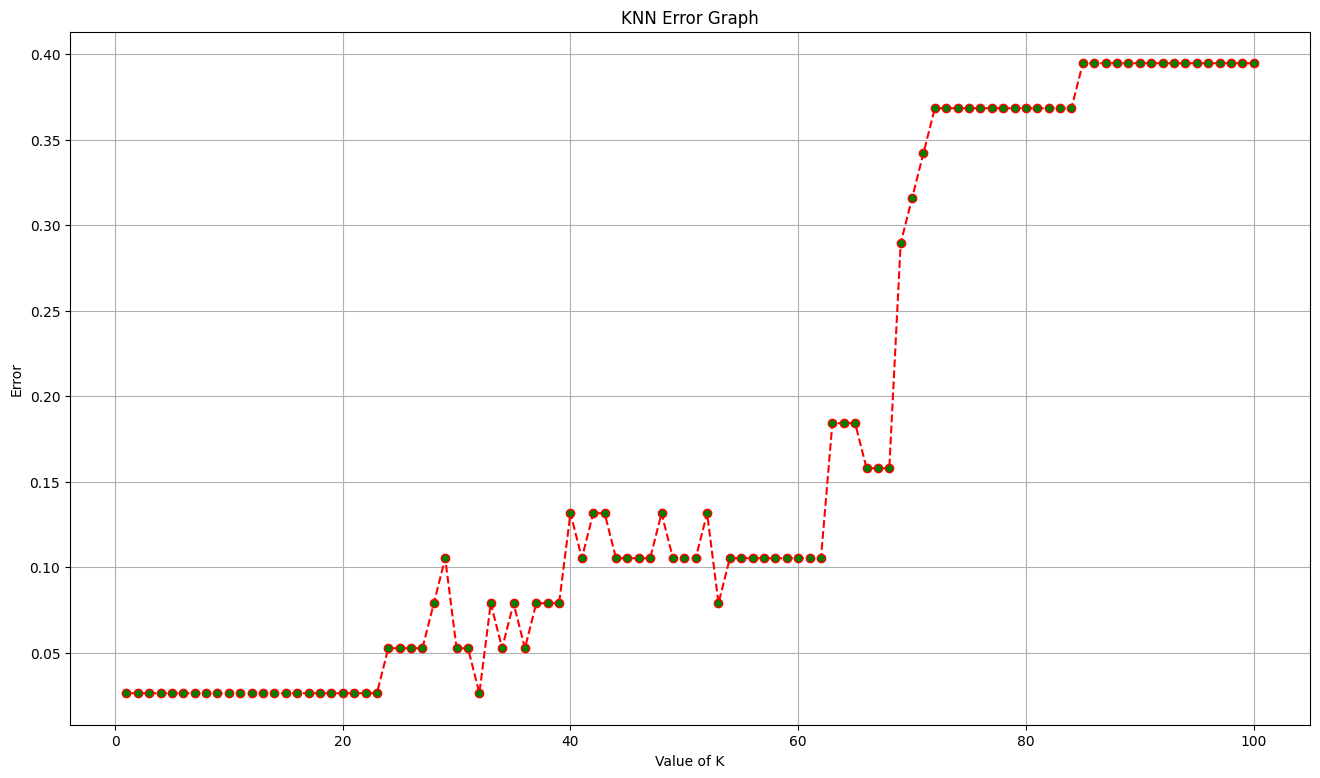

In [47]:
error = []
for k in range(1,101): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test) 
    error.append(np.mean(y_test != pred))

plt.figure(figsize=(16,9))
plt.title('KNN Error Graph')
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.plot(range(1,101), error, marker = 'o', mfc = 'green', color='red',
         ls = '--')

#### Feature Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
x_scaled = scaler.fit_transform(x)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0)

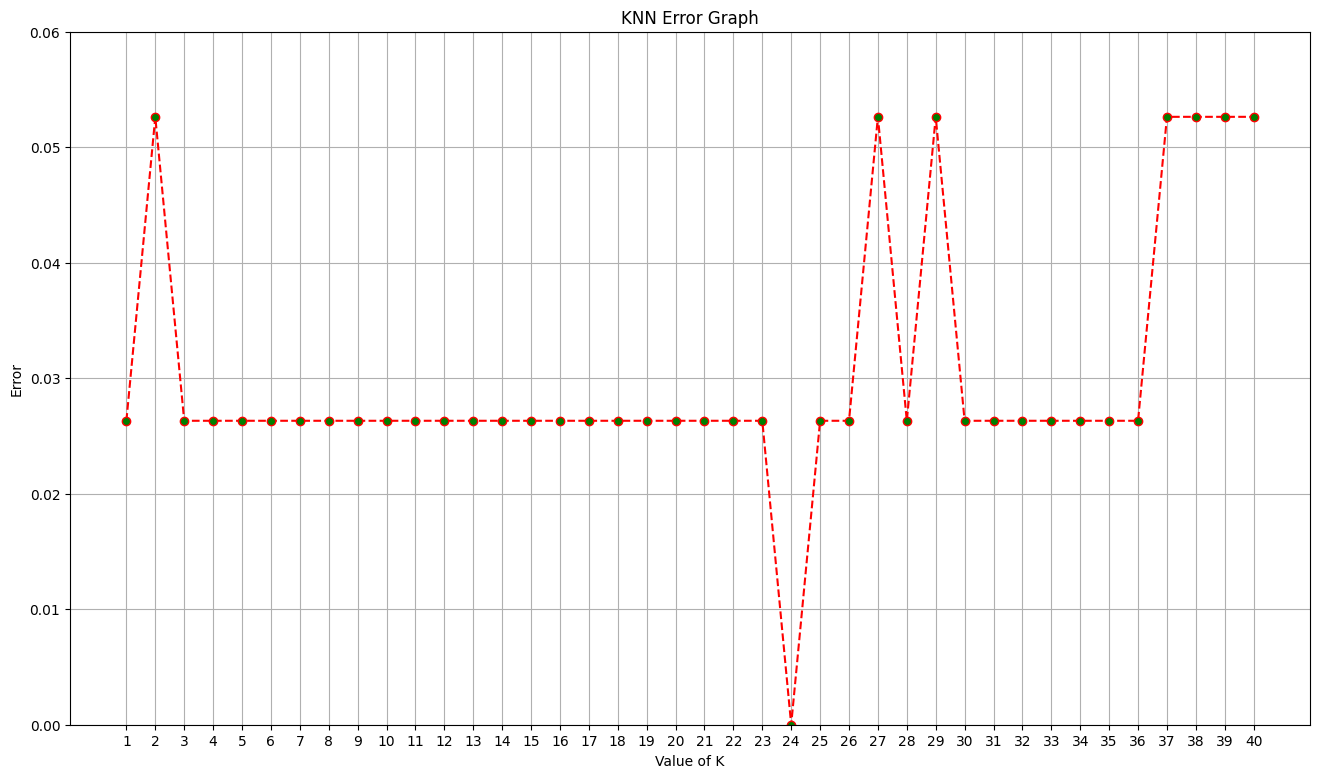

In [56]:
error = []
for k in range(1,41): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test) 
    error.append(np.mean(y_test != pred))

plt.figure(figsize=(16,9))
plt.title('KNN Error Graph')
plt.xlabel('Value of K')
plt.xticks(range(1,41))
plt.ylim(0,0.06)
plt.ylabel('Error')
plt.grid()
plt.plot(range(1,41), error, marker = 'o', mfc = 'green', color='red',
         ls = '--')

In [57]:
knn = KNeighborsClassifier(n_neighbors=24)

In [58]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [59]:
y_pred = knn.predict(x_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [63]:
newdf = pd.DataFrame(data=[[5.8, 2.6, 4.0, 1.2],
                           [7.6, 3.0, 6.6, 2.1],
                           [4.9, 3.1, 1.5, 0.1]], columns=x.columns)

In [64]:
newdf

,sepal_length,sepal_width,petal_length,petal_width
0,5.8,2.6,4.0,1.2
1,7.6,3.0,6.6,2.1
2,4.9,3.1,1.5,0.1


In [65]:
new_scaled = scaler.transform(newdf)

In [66]:
knn.predict(new_scaled)

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [67]:
new_scaled

array([[0.41666667, 0.25      , 0.50847458, 0.45833333],
       [0.91666667, 0.41666667, 0.94915254, 0.83333333],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])